In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/only_brs_with_most_accidents.csv')

BR 116
No de Acidentes: 9835
BR 101
No de Acidentes: 9965
BR 40
No de Acidentes: 3175
BR 381
No de Acidentes: 3494


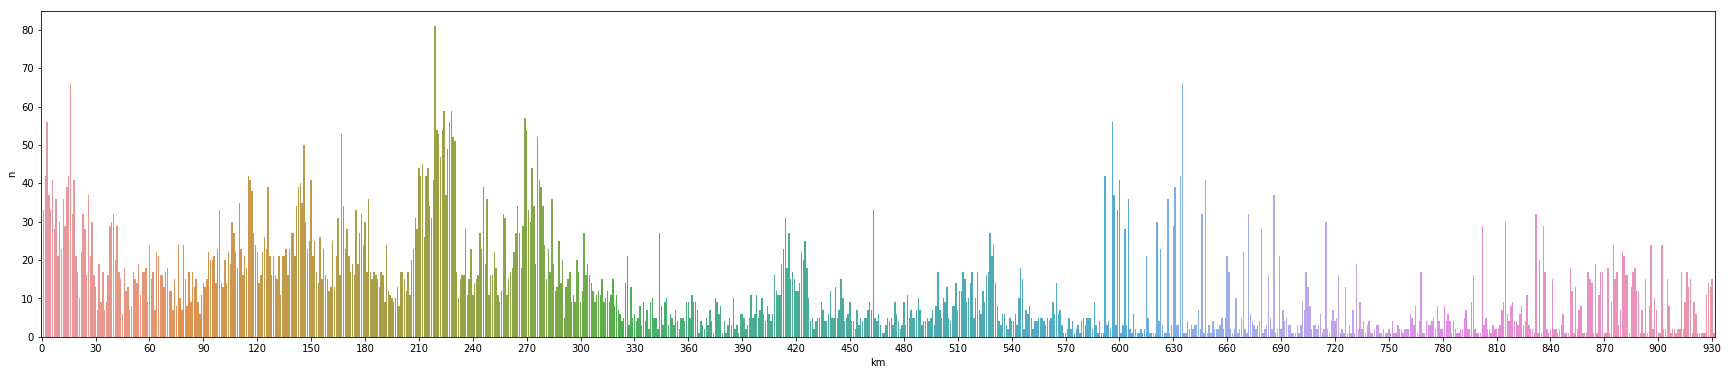

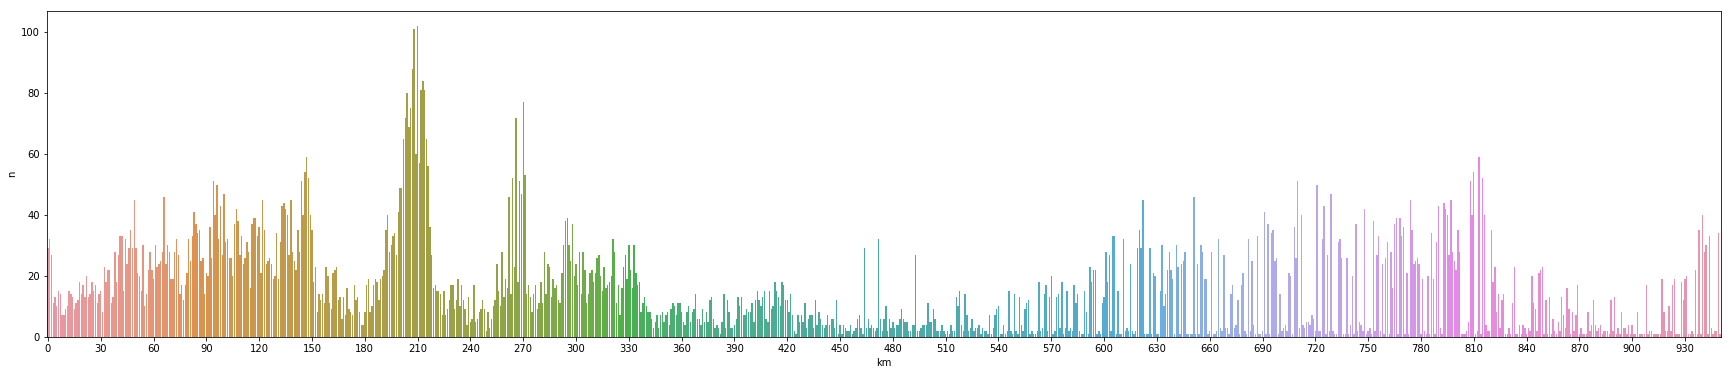

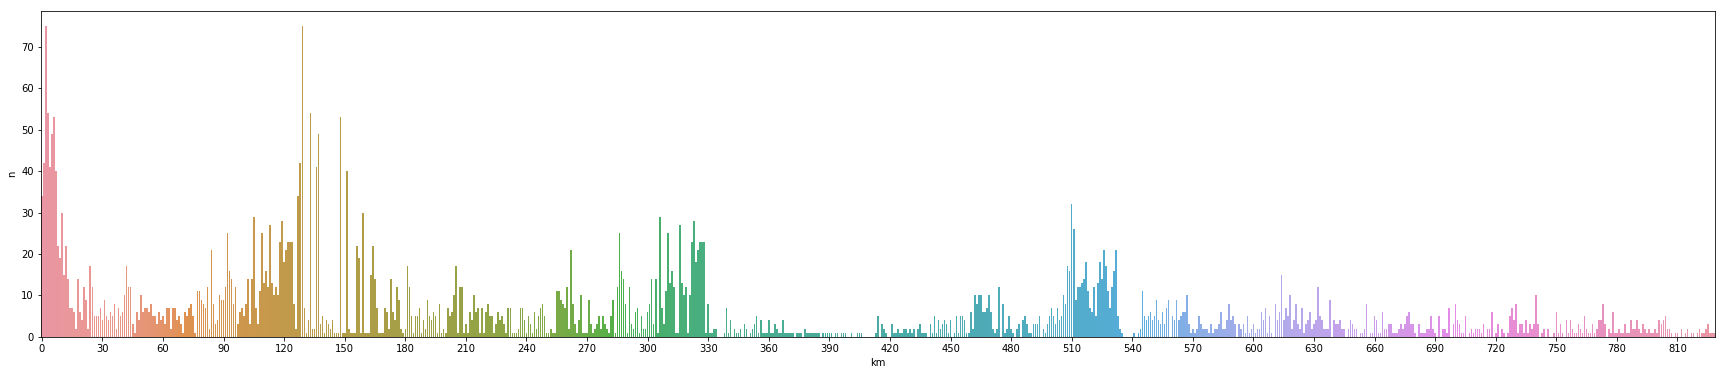

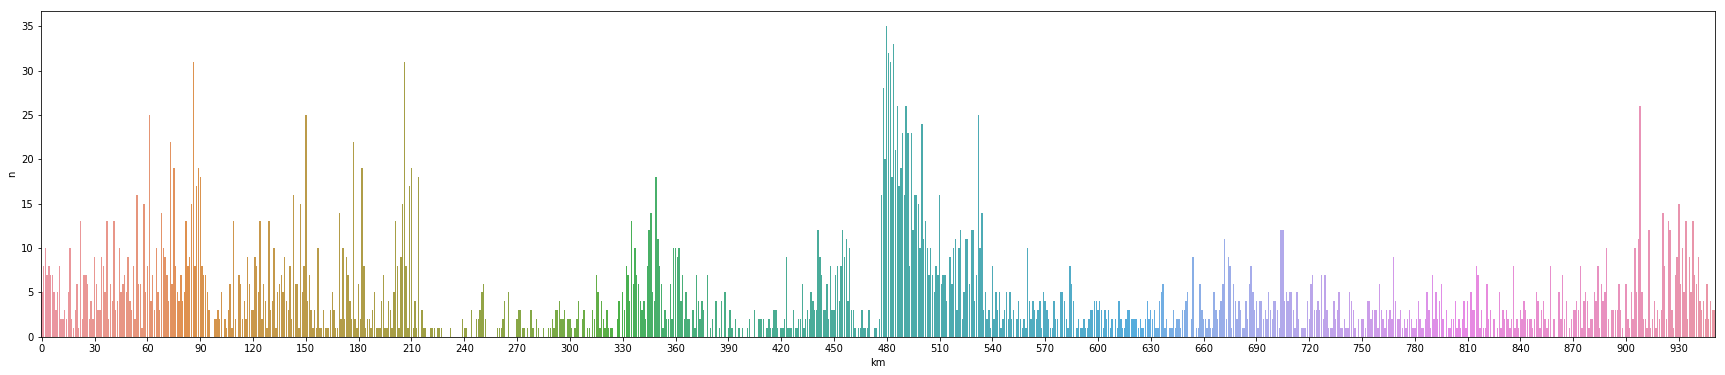

In [11]:
df['km'] = df['km'].round().astype(int)

for br in df['br'].unique():
    print(f"BR {br}")

    accidents_on_br = df[df['br'] == br]
    print(f"No de Acidentes: {len(accidents_on_br.index)}")
    
    count_by_km = accidents_on_br['km'].value_counts()

    kms_without_accidents = np.setdiff1d(
        range(0, accidents_on_br['km'].max()), # todos os km
        count_by_km.index, # kms com acidentes
        assume_unique=True
    )
    
    accidents_per_km = pd.DataFrame(data={
        'km': count_by_km.index,
        'n': count_by_km
    })
    accidents_per_km = accidents_per_km.append([{ 'km': km, 'n': 0 } for km in kms_without_accidents])
 
    plt.figure(figsize=(30,6))
    plot = sns.barplot(
        x='km',
        y='n',
        data=accidents_per_km,
        order=accidents_per_km.sort_values(by='km').index
    )
    kms_to_show_tick = range(0, accidents_on_br['km'].max(), 30)
    plot.set(xticks=kms_to_show_tick, xticklabels=kms_to_show_tick)